# Demo 10: Device

All other demos have by default used device = 'cpu'. In case we want to use cuda, we should pass the device argument to model and dataset.

In [1]:
from kan import KAN, create_dataset
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
model = KAN(width=[4,2,1,1], grid=3, k=3, seed=0, device=device)
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=3000, device=device)

# train the model
#model.train(dataset, opt="LBFGS", steps=20, lamb=1e-3, lamb_entropy=2.);
model.train(dataset, opt="LBFGS", steps=50, lamb=5e-5, lamb_entropy=2.);

train loss: 5.78e-03 | test loss: 5.89e-03 | reg: 7.32e+00 : 100%|██| 50/50 [00:26<00:00,  1.85it/s]


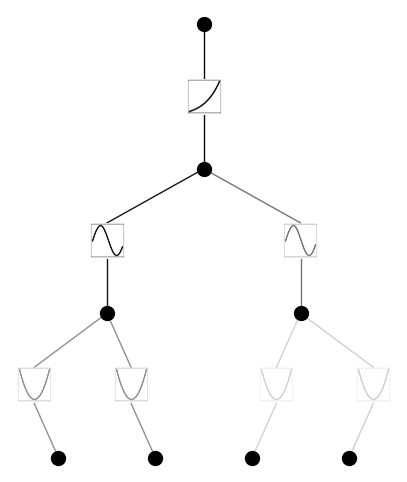

In [3]:
model.plot()